<a href="https://colab.research.google.com/github/kid-116/AI-in-WebDev-SMP/blob/main/K-Means/KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>K-Means Clustering</h1>
<h2>by kid116</h2>

<h3>Importing Libraries</h3>

In [278]:
import numpy as np
import matplotlib.pyplot as plt
import random

<h3>The Dataset</h3>

In [279]:
# Constants
m = 20

In [280]:
IQs = np.random.rand(1, m) # Random values in range [0, 1)
IQs *= 200 # IQ ranges from 0 - 200
print(IQs)

[[ 72.75936484  94.3406767  123.73218364 146.29521071 182.58966644
  152.58798828   6.55213315  80.43427606  36.85996784  61.71914604
  154.46811486 150.79482977  56.88640216 127.69763089  22.61359482
  110.75965573 196.94321056 154.58004615  72.63980329 160.10164198]]


In [281]:
EQs = np.random.rand(1, m)
EQs *= 200 # EQ also ranges from 0 - 200 it seems
print(EQs)

[[155.07904337 168.65687952 105.850196    37.8827493   66.3582058
   55.2334083  159.01595217  22.24469405  69.36651876 149.91463055
  139.45383559 199.58315887 130.2102239  145.60667198   2.21752468
    0.93574081  62.93273276   0.202414   150.86494772 191.08823968]]


In [282]:
X = np.vstack((IQs, EQs)).T
print(X)

[[ 72.75936484 155.07904337]
 [ 94.3406767  168.65687952]
 [123.73218364 105.850196  ]
 [146.29521071  37.8827493 ]
 [182.58966644  66.3582058 ]
 [152.58798828  55.2334083 ]
 [  6.55213315 159.01595217]
 [ 80.43427606  22.24469405]
 [ 36.85996784  69.36651876]
 [ 61.71914604 149.91463055]
 [154.46811486 139.45383559]
 [150.79482977 199.58315887]
 [ 56.88640216 130.2102239 ]
 [127.69763089 145.60667198]
 [ 22.61359482   2.21752468]
 [110.75965573   0.93574081]
 [196.94321056  62.93273276]
 [154.58004615   0.202414  ]
 [ 72.63980329 150.86494772]
 [160.10164198 191.08823968]]


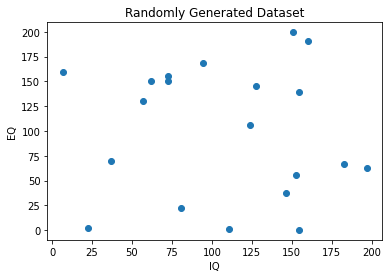

In [283]:
plt.scatter(IQs, EQs)
plt.xlabel("IQ")
plt.ylabel("EQ")
plt.title("Randomly Generated Dataset")
plt.show()

<h3>Methods for K-Means</h3>

In [284]:
def calc_dist(x1, x2):
  return abs(x1[0] - x2[0]) + abs(x1[1] - x2[1])

In [304]:
def run_kmeans(X, k):
  # Some constants
  m = X.shape[0]
  n = X.shape[1]
  # Initializing centroids
  centroids = np.random.rand(k, n)
  cluster_id = np.ones(m) * -1
  # Training
  while True:
    cost = 0
    # Assigning to centroids
    for p in range(m):
      min_dist = float('inf')
      for c in range(k):
        dist = calc_dist(X[p], centroids[c])
        if dist < min_dist:
          min_dist = dist
          cluster_id[p] = c
      cost += min_dist
    cost /= m
    # print(cost)
    # Calculating new centroids
    old_centroids = np.copy(centroids)
    for c in range(k):
      l = 1 # Number of points assigned to the cluster
      for p in range(m):
        if cluster_id[p] == c:
          centroids[c] += X[p]
          l = l + 1
      centroids[c] /= l
    div = np.sum(np.absolute(centroids - old_centroids))
    # print(div, end=" ")
    if div == 0:
      # print('\n', div)
      break
  return cost, cluster_id, centroids    

<h3>Choosing the Best k</h3>

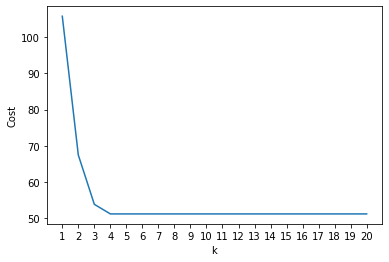

In [316]:
costs = []
ks = np.arange(1, 21, 1)

for k in ks:
  cost, cluster_id, centroids = run_kmeans(X, k)
  costs.append(cost)

plt.plot(ks, costs)
plt.xlabel("k")
plt.ylabel("Cost")
plt.xticks(np.arange(1, 21, 1))
plt.show()

<h3>Training</h3>

In [306]:
k = 4
cost, cluster_id, centroids = run_kmeans(X, k)

<h3>Plotting</h3>

In [312]:
colmap = {
    0: 'b',
    1: 'r',
    2: 'g',
    3: 'c',
    4: 'm',
    5: 'y',
    6: 'k',
}

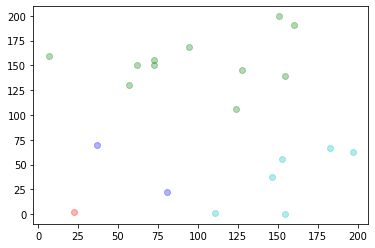

In [313]:
# for c in range(k):
#   plt.scatter(centroids[c][0], centroids[c][1], c=colmap[c])
for p in range(m):
  plt.scatter(X[p][0], X[p][1], c=colmap[cluster_id[p]], alpha=0.3)

plt.show()

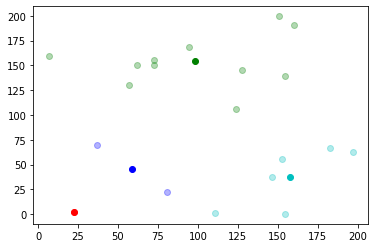

In [314]:
for c in range(k):
  plt.scatter(centroids[c][0], centroids[c][1], c=colmap[c])
for p in range(m):
  plt.scatter(X[p][0], X[p][1], c=colmap[cluster_id[p]], alpha=0.3)

plt.show()